In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [3]:
data = pd.read_csv("input/Digikala_orders.csv")
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [17]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])

data['OrderYearMonth'] = data['DateTime_CartFinalize'].map(lambda date: 100*date.year + date.month)

data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,order_month,orders,OrderYearMonth
99999,7101910,3393397,294942,2017-04-23 11:31:01,100000.0,تهران,1.0,April,7101910,201704
141232,12218373,689301,699655,2018-04-05 20:36:37,400000.0,شیراز,1.0,April,12218373,201804
92200,3791688,2511268,75127,2016-04-11 16:51:09,120092.0,تهران,1.0,April,3791688,201604
92198,12183941,6900318,779831,2018-04-04 00:48:26,1000.0,تهران,1.0,April,12183941,201804
141230,12671932,7011761,515231,2018-04-30 09:20:42,13992477.0,تهران,1.0,April,12671932,201804


In [19]:
data["orders"] = data["ID_Order"]

order_counts = data.groupby(["OrderYearMonth"])["orders"].count().reset_index()
order_counts.head()

,OrderYearMonth,orders
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141


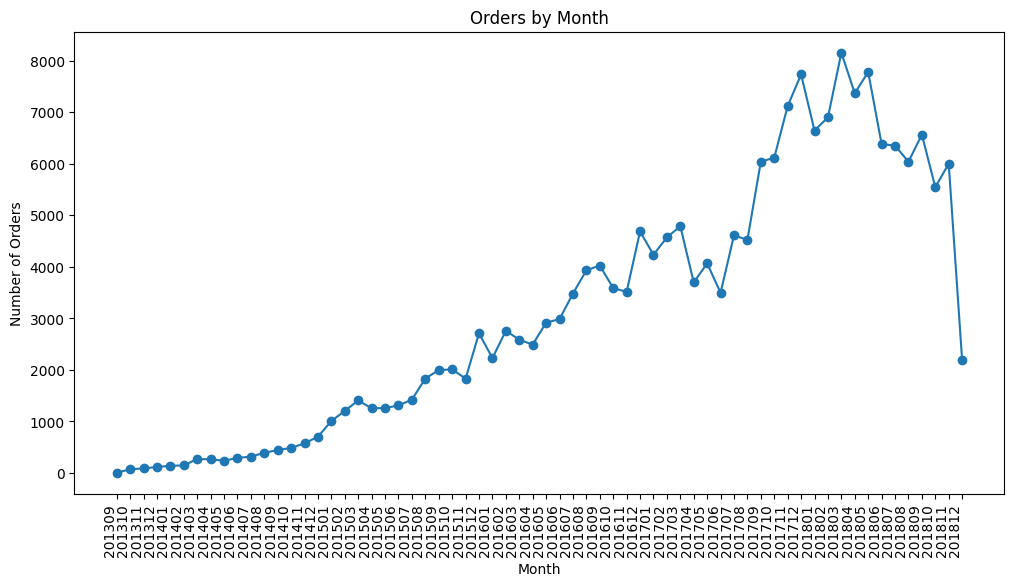

In [28]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90, ha="right")
plt.plot(order_counts["OrderYearMonth"].to_numpy(dtype=str), order_counts["orders"], marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Orders by Month")
plt.show()

In [45]:
data_city = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()

result = data_city.sort_values('ID_Customer', ascending=False).head(8)

others_count = data_city.sort_values('ID_Customer', ascending=False)[8:]['ID_Customer'].sum()

result.loc[len(result)] = ['Others', others_count]

persian_labels = [get_display(reshape(label)) for label in result['city_name_fa'].to_numpy(dtype='str')]

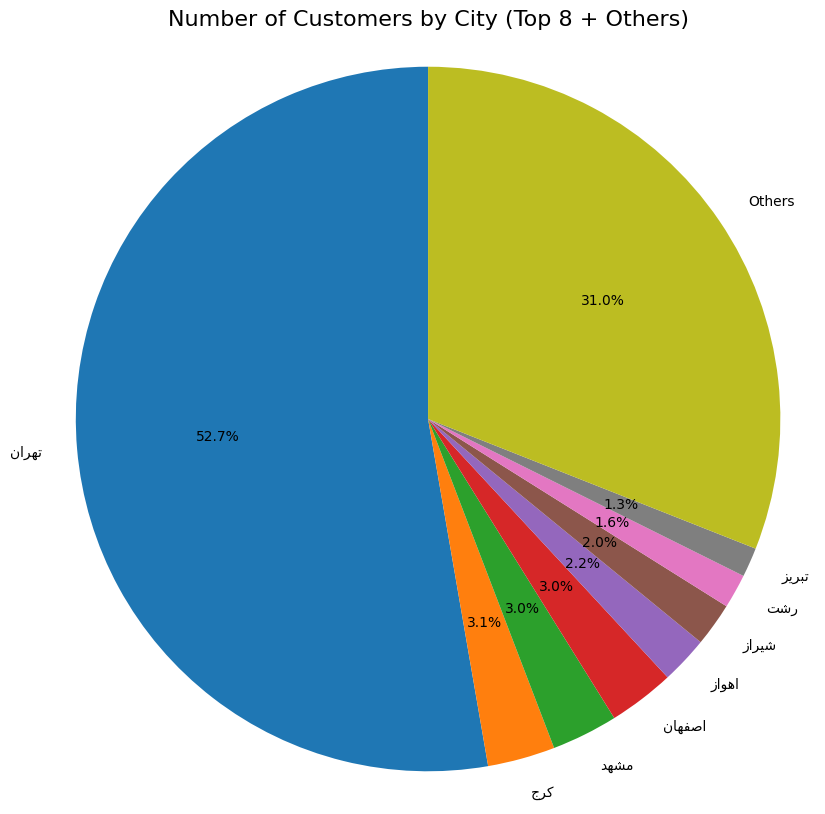

In [46]:
plt.figure(figsize=(10, 10))
plt.pie(result["ID_Customer"], labels=persian_labels, autopct='%1.1f%%', startangle=90)
plt.title("Number of Customers by City (Top 8 + Others)", fontsize=16)

plt.axis("equal")

plt.show()